
<img align="left" width="400" height="100" src="https://pandas.pydata.org/pandas-docs/stable/_static/pandas.svg">
<img align="right" width="200" height="100" src="https://upload.wikimedia.org/wikipedia/en/thumb/c/cd/Anaconda_Logo.png/330px-Anaconda_Logo.png">

# Course: <font color='blue'>Statistical Machine Learning</font>
# Author: <font color='blue'>*Syed Muhammad Wali Rizwan*</font>
 

In [109]:
# import packages that helps to analysis and working with the given data...
# All these packages are used in analysing the given data so load them early and set up an enviroment for working...
%matplotlib inline

import numpy as np # Python Library...
import pandas as pd # Python Package based on Numpy...
import seaborn as sns # Python data visualization library...
import matplotlib as mpl # Python data visualization Package... 
import matplotlib.pyplot as plt
import os
from sklearn.datasets import load_iris
import warnings
warnings.simplefilter('ignore') # give arrgument ignore in simplefilter just to hide the warning messages before 
# visualization of graphs....

In [110]:
Iris_Data = load_iris()
Iris_Data;

In [111]:
#print(Iris_Data.data)

In [112]:
#print(Iris_Data.target)

In [113]:
print(Iris_Data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [114]:
ID = Iris_Data

In [115]:
df = pd.DataFrame({'Sepal_Length': ID.data[:,0],
                   'Sepal_Width': ID.data[:,1],
                   'Patel_Length': ID.data[:,2],
                   'Patel_Width': ID.data[:,3], 
                   'Clusters': ID.target})
df.head(2)

,Sepal_Length,Sepal_Width,Patel_Length,Patel_Width,Clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [116]:
#df.info()

In [117]:
df['Clusters'].value_counts()

2    50
1    50
0    50
Name: Clusters, dtype: int64

In [118]:
# In the end needs to work on legends if i got the time and energy
Color = np.array(['red','blue','green'])
#label = ['1','2','3']


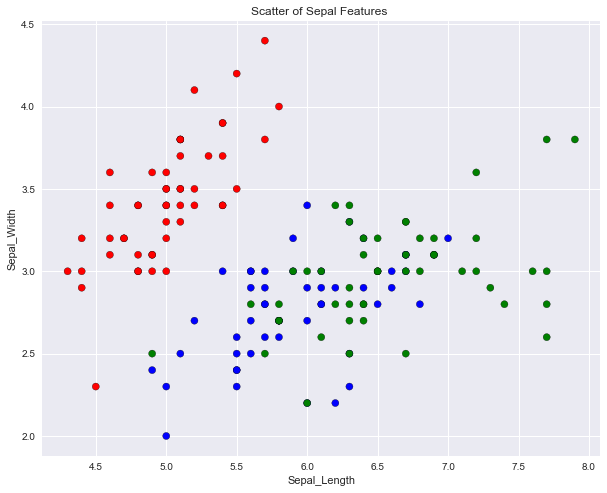

In [119]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df['Sepal_Length'],df['Sepal_Width'], 
            c=Color[ID.target], edgecolor='k', s=50)
plt.style.use('seaborn')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.title('Scatter of Sepal Features ');

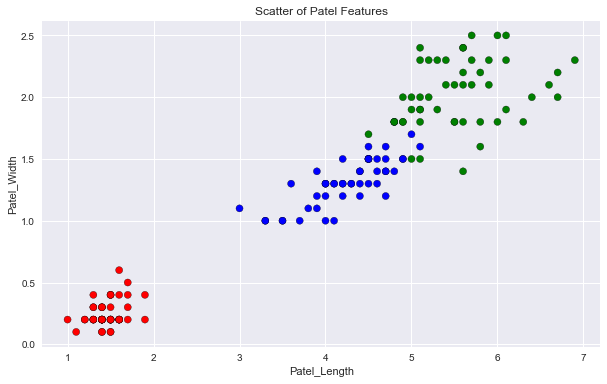

In [120]:
Color = np.array(['red','blue','green'])
fig = plt.figure(figsize=(10,6))
plt.scatter(df['Patel_Length'],df['Patel_Width'], c=Color[ID.target],
            edgecolor='k', s=50)
plt.style.use('seaborn')
plt.xlabel('Patel_Length')
plt.ylabel('Patel_Width')
plt.title('Scatter of Patel Features');

<AxesSubplot:>

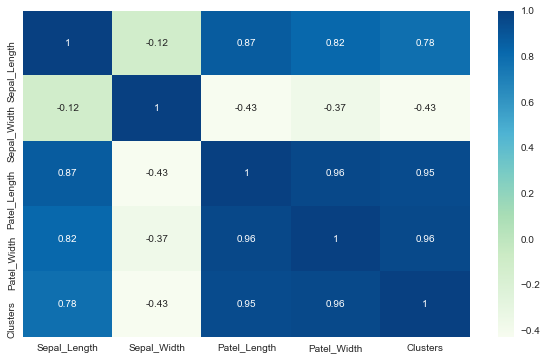

In [145]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='GnBu')

# 2- Based on the sepal length and sepal width,
### • Find the optimal number of clusters using the elbow method.
### • Using K-Means clustering, identify the optimal locations of the clusters centers.
### • Evaluate the accuracy of this unsupervised clustering.

In [121]:
Array_Cluster = df['Clusters']
Array_Cluster

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Clusters, Length: 150, dtype: int32

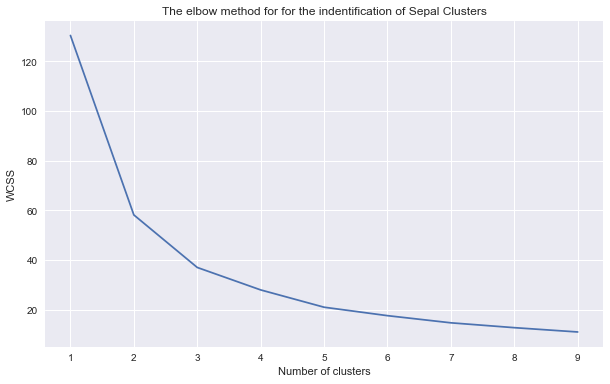

<Figure size 576x396 with 0 Axes>

In [122]:
# Finding the optimum number of clusters for k-means classification
Sepal = df.iloc[:, [0, 1]].values

from sklearn.cluster import KMeans
#Implicit objective function in k-Means measures sum of distances of observations from their cluster centroids,
wcss = [] 
#called Within-Cluster-Sum-of-Squares (WCSS)
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Sepal)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
fig = plt.figure(figsize=(10,6))
plt.plot(range(1, 10), wcss)
plt.style.use('seaborn')
plt.title('The elbow method for for the indentification of Sepal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.figure()
plt.show();

In [123]:
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=10, 
                max_iter=300, random_state=42)

In [124]:
kmeans.fit(df.iloc[:, [0, 1]].values)

KMeans(n_clusters=3, random_state=42)

In [125]:
s_kmeans=kmeans.predict(df.iloc[:, [0, 1]].values)
s_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [126]:
kmeans.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

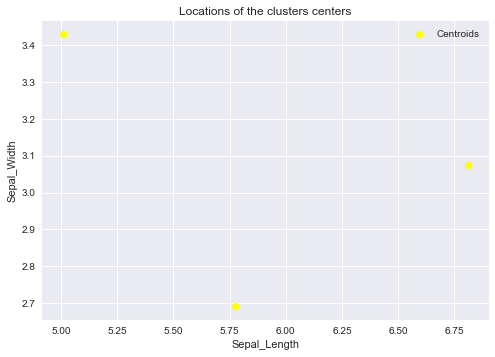

In [127]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')
plt.style.use('seaborn')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.title('Locations of the clusters centers');

plt.legend()

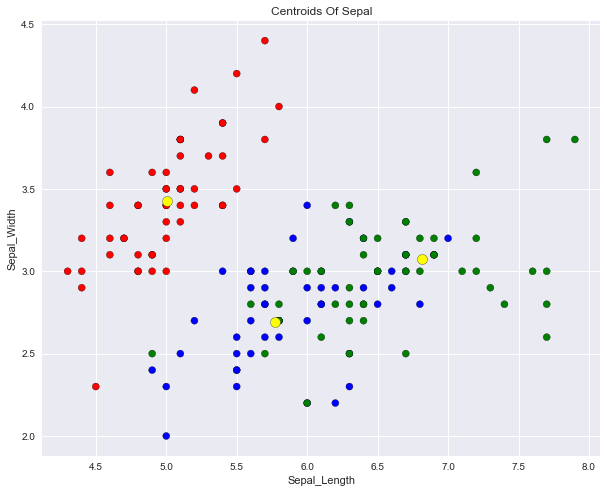

In [128]:
Color = np.array(['red','blue','green'])

fig = plt.figure(figsize=(10, 8))

plt.scatter(df['Sepal_Length'], df['Sepal_Width'], c=Color[ID.target],edgecolor='k')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids',edgecolor='k')

plt.style.use('seaborn')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.title('Centroids Of Sepal');
plt.show()

In [129]:
from sklearn.metrics import adjusted_rand_score

score = adjusted_rand_score(Array_Cluster,s_kmeans)
score

0.6006861021484542

# 3- Based on the petal length and petal width, 
### • find the optimal number of clusters using the elbow method.
### • Using K-Means clustering, identify the optimal locations of the clusters centers.
### • Evaluate the accuracy of this unsupervised clustering

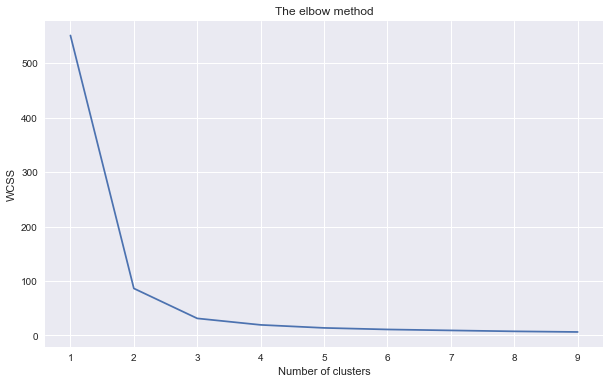

<Figure size 576x396 with 0 Axes>

In [130]:
# Finding the optimum number of clusters for k-means classification
Patel = df.iloc[:, [2, 3]].values

from sklearn.cluster import KMeans
#Implicit objective function in k-Means measures sum of distances of observations from their cluster centroids,
wcss = [] 
#called Within-Cluster-Sum-of-Squares (WCSS)
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Patel)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
fig = plt.figure(figsize=(10,6))
plt.plot(range(1, 10), wcss)
plt.style.use('seaborn')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.figure()
plt.show();

In [131]:
kmeans_patel = KMeans(init="k-means++", n_clusters=3, n_init=10, 
                max_iter=300, random_state=42)
kmeans_patel

KMeans(n_clusters=3, random_state=42)

In [132]:
kmeans_patel.fit(df.iloc[:, [2, 3]].values)

KMeans(n_clusters=3, random_state=42)

In [133]:
p_kmeans = kmeans_patel.predict(df.iloc[:, [2, 3]].values)
p_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

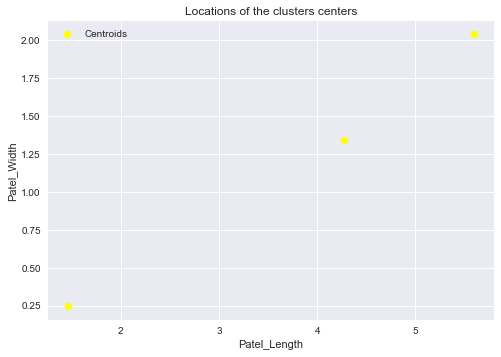

In [134]:
# Plotting the centroids of the clusters
plt.scatter(kmeans_patel.cluster_centers_[:, 0], kmeans_patel.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.style.use('seaborn')
plt.xlabel('Patel_Length')
plt.ylabel('Patel_Width')
plt.title('Locations of the clusters centers');

plt.legend()

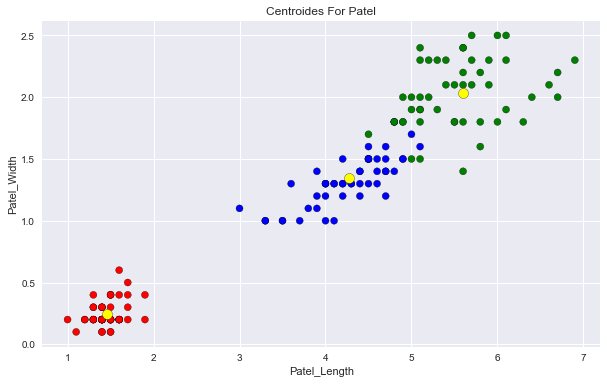

In [135]:
Color = np.array(['red','blue','green'])

fig = plt.figure(figsize=(10, 6))

plt.scatter(df['Patel_Length'], df['Patel_Width'], c=Color[ID.target],edgecolor='k')

plt.scatter(kmeans_patel.cluster_centers_[:, 0], kmeans_patel.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids',edgecolor='k')

plt.style.use('seaborn')
plt.xlabel('Patel_Length')
plt.ylabel('Patel_Width')
plt.title('Centroides For Patel');
plt.show()

In [136]:
from sklearn.metrics import adjusted_rand_score

score = adjusted_rand_score(Array_Cluster,p_kmeans)
score

0.8856970310281228

# 4- Based on all the features (sepal length, sepal width, petal length, and petal width)
### • Find the optimal number of clusters using the elbow method.
### • Using K-Means clustering, identify the optimal locations of the clusters centers.
### • Evaluate the accuracy of this unsupervised clustering

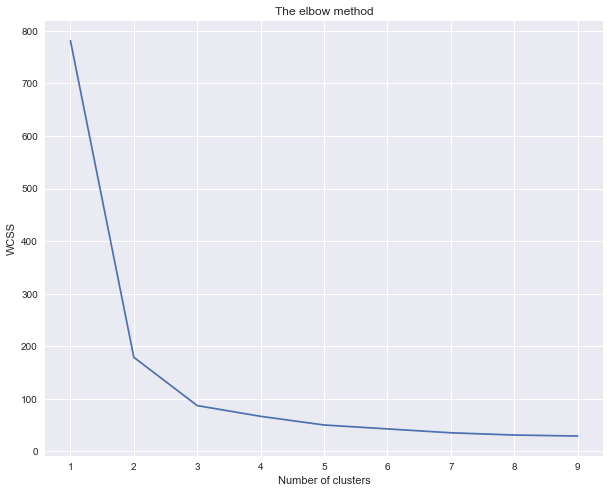

<Figure size 576x396 with 0 Axes>

In [137]:
# Finding the optimum number of clusters for k-means classification
x = df.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
#Implicit objective function in k-Means measures sum of distances of observations from their cluster centroids,
wcss = [] 
#called Within-Cluster-Sum-of-Squares (WCSS)
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 20, random_state = 0)
    kmeans.fit(l)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 10), wcss)
plt.style.use('seaborn')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.figure()
plt.show();

In [138]:
kmeans_All = KMeans(init="k-means++", n_clusters=3, n_init=20, 
                max_iter=500, random_state=0)
kmeans_All

KMeans(max_iter=500, n_clusters=3, n_init=20, random_state=0)

In [139]:
kmeans_All.fit(x)

KMeans(max_iter=500, n_clusters=3, n_init=20, random_state=0)

In [140]:
All_kmeans = kmeans_All.predict(x)
All_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [141]:
from sklearn.metrics import adjusted_rand_score

score = adjusted_rand_score(Array_Cluster,All_kmeans)
score

0.7302382722834697

# 5- Discuss the results obtained from clustering based on the different features in part 2-4.

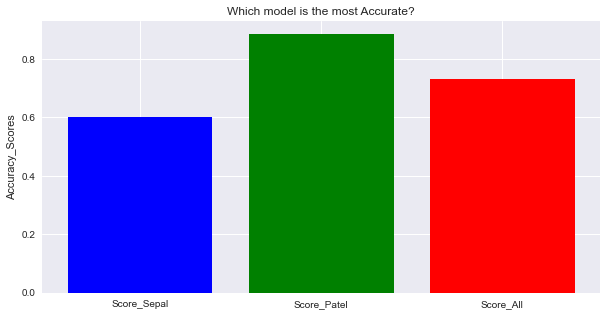

In [142]:
fig = plt.figure(figsize=(10,5))
models = ['Score_Sepal', 'Score_Patel', 'Score_All']
acc_scores = [0.600, 0.885, 0.730]

plt.bar(models, acc_scores, color=['blue', 'green', 'red'])
plt.ylabel("Accuracy_Scores")
plt.title("Which model is the most Accurate?")
plt.show()